In [1]:
import os
import sys
from tempfile import NamedTemporaryFile
from urllib.request import urlopen
from urllib.parse import unquote, urlparse
from urllib.error import HTTPError
from zipfile import ZipFile
import tarfile
import shutil

CHUNK_SIZE = 40960
DATA_SOURCE_MAPPING = 'diabetes-health-indicators-dataset:https%3A%2F%2Fstorage.googleapis.com%2Fkaggle-data-sets%2F1703281%2F2789260%2Fbundle%2Farchive.zip%3FX-Goog-Algorithm%3DGOOG4-RSA-SHA256%26X-Goog-Credential%3Dgcp-kaggle-com%2540kaggle-161607.iam.gserviceaccount.com%252F20240628%252Fauto%252Fstorage%252Fgoog4_request%26X-Goog-Date%3D20240628T182238Z%26X-Goog-Expires%3D259200%26X-Goog-SignedHeaders%3Dhost%26X-Goog-Signature%3D9d3f44c2e893560985330d81fcb385410262ba1bbd9d4c0ade41561c47fddf090392107232c6203c86b707f003841d4b028e3dd70aa14c0723148b80b993dd07f54bf3c558526f0ef3084e98677c40ffa90a358504ff12c38c6e053b006db306f48bea42d34d9b02af5e4f64d3afe85c94f8f1d11803a58b3a99c75557b301179f7e72ebb2bddac9805860dff3c14eb890c72aa0f00acaeaff4f7500c60051fc1317e9bb9b9ab309bc549b5e3237a8604218558f709ded7ef7048b1646a01a1edbacd306d186ede3def1609b2898da830602e9efe05d014d2129aab7da6c069fba5637d81210fe4b73caf96a3835f5d3c87ef01b657af65500bd9f57bebe23d4'

KAGGLE_INPUT_PATH='/kaggle/input'
KAGGLE_WORKING_PATH='/kaggle/working'
KAGGLE_SYMLINK='kaggle'

!umount /kaggle/input/ 2> /dev/null
shutil.rmtree('/kaggle/input', ignore_errors=True)
os.makedirs(KAGGLE_INPUT_PATH, 0o777, exist_ok=True)
os.makedirs(KAGGLE_WORKING_PATH, 0o777, exist_ok=True)

try:
  os.symlink(KAGGLE_INPUT_PATH, os.path.join("..", 'input'), target_is_directory=True)
except FileExistsError:
  pass
try:
  os.symlink(KAGGLE_WORKING_PATH, os.path.join("..", 'working'), target_is_directory=True)
except FileExistsError:
  pass

for data_source_mapping in DATA_SOURCE_MAPPING.split(','):
    directory, download_url_encoded = data_source_mapping.split(':')
    download_url = unquote(download_url_encoded)
    filename = urlparse(download_url).path
    destination_path = os.path.join(KAGGLE_INPUT_PATH, directory)
    try:
        with urlopen(download_url) as fileres, NamedTemporaryFile() as tfile:
            total_length = fileres.headers['content-length']
            print(f'Downloading {directory}, {total_length} bytes compressed')
            dl = 0
            data = fileres.read(CHUNK_SIZE)
            while len(data) > 0:
                dl += len(data)
                tfile.write(data)
                done = int(50 * dl / int(total_length))
                sys.stdout.write(f"\r[{'=' * done}{' ' * (50-done)}] {dl} bytes downloaded")
                sys.stdout.flush()
                data = fileres.read(CHUNK_SIZE)
            if filename.endswith('.zip'):
              with ZipFile(tfile) as zfile:
                zfile.extractall(destination_path)
            else:
              with tarfile.open(tfile.name) as tarfile:
                tarfile.extractall(destination_path)
            print(f'\nDownloaded and uncompressed: {directory}')
    except HTTPError as e:
        print(f'Failed to load (likely expired) {download_url} to path {destination_path}')
        continue
    except OSError as e:
        print(f'Failed to load {download_url} to path {destination_path}')
        continue

print('Data source import complete.')


[==================================================] 6324278 bytes downloaded
Downloaded and uncompressed: diabetes-health-indicators-dataset
Data source import complete.


In [9]:
# Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# Here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

import matplotlib.pyplot as plt
import seaborn as sns

# Input data files are available in the read-only "../input/" directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

/kaggle/input/diabetes-health-indicators-dataset/diabetes_binary_5050split_health_indicators_BRFSS2015.csv
/kaggle/input/diabetes-health-indicators-dataset/diabetes_binary_health_indicators_BRFSS2015.csv
/kaggle/input/diabetes-health-indicators-dataset/diabetes_012_health_indicators_BRFSS2015.csv


In [10]:
df = pd.read_csv('/kaggle/input/diabetes-health-indicators-dataset/diabetes_012_health_indicators_BRFSS2015.csv')
df.head(5)

,Diabetes_012,HighBP,HighChol,CholCheck,BMI,Smoker,Stroke,HeartDiseaseorAttack,PhysActivity,Fruits,...,AnyHealthcare,NoDocbcCost,GenHlth,MentHlth,PhysHlth,DiffWalk,Sex,Age,Education,Income
0,0.0,1.0,1.0,1.0,40.0,1.0,0.0,0.0,0.0,0.0,...,1.0,0.0,5.0,18.0,15.0,1.0,0.0,9.0,4.0,3.0
1,0.0,0.0,0.0,0.0,25.0,1.0,0.0,0.0,1.0,0.0,...,0.0,1.0,3.0,0.0,0.0,0.0,0.0,7.0,6.0,1.0
2,0.0,1.0,1.0,1.0,28.0,0.0,0.0,0.0,0.0,1.0,...,1.0,1.0,5.0,30.0,30.0,1.0,0.0,9.0,4.0,8.0
3,0.0,1.0,0.0,1.0,27.0,0.0,0.0,0.0,1.0,1.0,...,1.0,0.0,2.0,0.0,0.0,0.0,0.0,11.0,3.0,6.0
4,0.0,1.0,1.0,1.0,24.0,0.0,0.0,0.0,1.0,1.0,...,1.0,0.0,2.0,3.0,0.0,0.0,0.0,11.0,5.0,4.0


In [11]:
print("shape: ", df.shape)
df.isna().sum()
#df.dropna(inplace=True)

shape:  (253680, 22)


Diabetes_012            0
HighBP                  0
HighChol                0
CholCheck               0
BMI                     0
Smoker                  0
Stroke                  0
HeartDiseaseorAttack    0
PhysActivity            0
Fruits                  0
Veggies                 0
HvyAlcoholConsump       0
AnyHealthcare           0
NoDocbcCost             0
GenHlth                 0
MentHlth                0
PhysHlth                0
DiffWalk                0
Sex                     0
Age                     0
Education               0
Income                  0
dtype: int64

Checking for missing data. No missing data found.

In [12]:
df.dtypes

Diabetes_012            float64
HighBP                  float64
HighChol                float64
CholCheck               float64
BMI                     float64
Smoker                  float64
Stroke                  float64
HeartDiseaseorAttack    float64
PhysActivity            float64
Fruits                  float64
Veggies                 float64
HvyAlcoholConsump       float64
AnyHealthcare           float64
NoDocbcCost             float64
GenHlth                 float64
MentHlth                float64
PhysHlth                float64
DiffWalk                float64
Sex                     float64
Age                     float64
Education               float64
Income                  float64
dtype: object

# Definitions
**Diabetes_012**  
0 = Not diabetic  
1 = Pre diabetic  
2 = diabetic

In [13]:
df.groupby('Diabetes_012').count()

,HighBP,HighChol,CholCheck,BMI,Smoker,Stroke,HeartDiseaseorAttack,PhysActivity,Fruits,Veggies,...,AnyHealthcare,NoDocbcCost,GenHlth,MentHlth,PhysHlth,DiffWalk,Sex,Age,Education,Income
Diabetes_012,,,,,,,,,,,,,,,,,,,,,
0.0,213703,213703,213703,213703,213703,213703,213703,213703,213703,213703,...,213703,213703,213703,213703,213703,213703,213703,213703,213703,213703
1.0,4631,4631,4631,4631,4631,4631,4631,4631,4631,4631,...,4631,4631,4631,4631,4631,4631,4631,4631,4631,4631
2.0,35346,35346,35346,35346,35346,35346,35346,35346,35346,35346,...,35346,35346,35346,35346,35346,35346,35346,35346,35346,35346


In [14]:
df.groupby(['Diabetes_012','HighBP']).HighBP.count()

Diabetes_012  HighBP
0.0           0.0       134391
              1.0        79312
1.0           0.0         1718
              1.0         2913
2.0           0.0         8742
              1.0        26604
Name: HighBP, dtype: int64

# High Blood Pressure
It looks like HBP is an indicator of diabetes. A higher percent of people with diabetes and pre-diabetes have high blood pressure.

In [15]:
#df['HBP'] = df['HighBP'].map({0.0: 'No', 1.0: 'Yes'})
#df.HBP.value_counts().sort_index()

Creating 3 pie charts to compare the percentage of patients with high blood pressure broken out by diabetes.

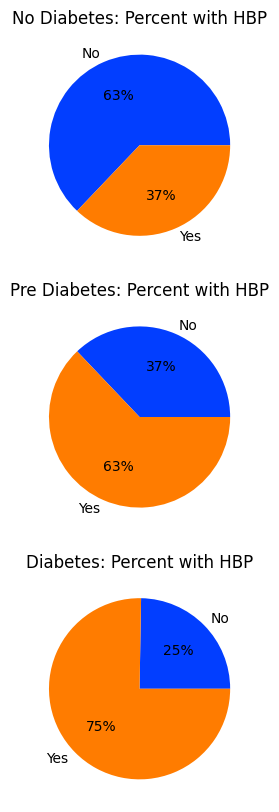

In [16]:
colors = sns.color_palette('bright')[0:5]
fig, ax = plt.subplots(nrows=3,figsize=(15, 10))
i=1
for i in range(0, 3):
    dfx = df.query('Diabetes_012 == ' + str(i))
    ax[i].pie(dfx.HighBP.value_counts().sort_index(), labels = ['No','Yes'], colors = colors, autopct='%.0f%%')

#df1 = df.query('Diabetes_012 == 0.0')
#df2 = df.query('Diabetes_012 == 1.0')
#df3 = df.query('Diabetes_012 == 2.0')
#ax[0].pie(df1.HighBP.value_counts().sort_index(), labels = ['No','Yes'], colors = colors, autopct='%.0f%%')
ax[0].set_title('No Diabetes: Percent with HBP')
#ax[1].pie(df2.HighBP.value_counts().sort_index(), labels = ['No','Yes'], colors = colors, autopct='%.0f%%')
ax[1].set_title('Pre Diabetes: Percent with HBP')
#ax[2].pie(df3.HighBP.value_counts().sort_index(), labels = ['No','Yes'], colors = colors, autopct='%.0f%%')
ax[2].set_title('Diabetes: Percent with HBP')


plt.show()

# Correlation check

In [17]:
df.corr()

,Diabetes_012,HighBP,HighChol,CholCheck,BMI,Smoker,Stroke,HeartDiseaseorAttack,PhysActivity,Fruits,...,AnyHealthcare,NoDocbcCost,GenHlth,MentHlth,PhysHlth,DiffWalk,Sex,Age,Education,Income
Diabetes_012,1.000000,0.271596,0.209085,0.067546,0.224379,0.062914,0.107179,0.180272,-0.121947,-0.042192,...,0.015410,0.035436,0.302587,0.073507,0.176287,0.224239,0.031040,0.185026,-0.130517,-0.171483
HighBP,0.271596,1.000000,0.298199,0.098508,0.213748,0.096991,0.129575,0.209361,-0.125267,-0.040555,...,0.038425,0.017358,0.300530,0.056456,0.161212,0.223618,0.052207,0.344452,-0.141358,-0.171235
HighChol,0.209085,0.298199,1.000000,0.085642,0.106722,0.091299,0.092620,0.180765,-0.078046,-0.040859,...,0.042230,0.013310,0.208426,0.062069,0.121751,0.144672,0.031205,0.272318,-0.070802,-0.085459
CholCheck,0.067546,0.098508,0.085642,1.000000,0.034495,-0.009929,0.024158,0.044206,0.004190,0.023849,...,0.117626,-0.058255,0.046589,-0.008366,0.031775,0.040585,-0.022115,0.090321,0.001510,0.014259
BMI,0.224379,0.213748,0.106722,0.034495,1.000000,0.013804,0.020153,0.052904,-0.147294,-0.087518,...,-0.018471,0.058206,0.239185,0.085310,0.121141,0.197078,0.042950,-0.036618,-0.103932,-0.100069
Smoker,0.062914,0.096991,0.091299,-0.009929,0.013804,1.000000,0.061173,0.114441,-0.087401,-0.077666,...,-0.023251,0.048946,0.163143,0.092196,0.116460,0.122463,0.093662,0.120641,-0.161955,-0.123937
Stroke,0.107179,0.129575,0.092620,0.024158,0.020153,0.061173,1.000000,0.203002,-0.069151,-0.013389,...,0.008776,0.034804,0.177942,0.070172,0.148944,0.176567,0.002978,0.126974,-0.076009,-0.128599
HeartDiseaseorAttack,0.180272,0.209361,0.180765,0.044206,0.052904,0.114441,0.203002,1.000000,-0.087299,-0.019790,...,0.018734,0.031000,0.258383,0.064621,0.181698,0.212709,0.086096,0.221618,-0.099600,-0.141011
PhysActivity,-0.121947,-0.125267,-0.078046,0.004190,-0.147294,-0.087401,-0.069151,-0.087299,1.000000,0.142756,...,0.035505,-0.061638,-0.266186,-0.125587,-0.219230,-0.253174,0.032482,-0.092511,0.199658,0.198539
Fruits,-0.042192,-0.040555,-0.040859,0.023849,-0.087518,-0.077666,-0.013389,-0.019790,0.142756,1.000000,...,0.031544,-0.044243,-0.103854,-0.068217,-0.044633,-0.048352,-0.091175,0.064547,0.110187,0.079929


# High Cholesterol Analysis

In [18]:
#df.groupby(['Diabetes_012','HighChol']).HighChol.count()
g=df.groupby(['Diabetes_012','HighChol']).agg({'BMI':'count'})
chol = 100 * g['BMI'] / g.groupby(['Diabetes_012'])['BMI'].transform('sum')
chol

Diabetes_012  HighChol
0.0           0.0         62.082891
              1.0         37.917109
1.0           0.0         37.918376
              1.0         62.081624
2.0           0.0         32.988174
              1.0         67.011826
Name: BMI, dtype: float64

High cholesterol looks similar to high blood pressure. The higher percentage with high cholesterol, the more likely you have diabetes. It doesn't increase as strongly as high blood pressure, hence the lower correlation number (.271 vs .209).

<Axes: xlabel='Diabetes_012', ylabel='count'>

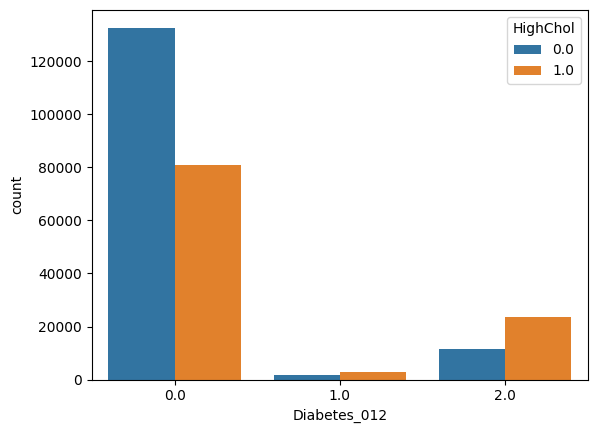

In [19]:
sns.countplot(x='Diabetes_012', hue='HighChol', data=df)


# BMI Analysis

Body Mass Index mean and median by Diabetes type

In [20]:
df.groupby(['Diabetes_012']).BMI.agg(['mean', 'median'])

,mean,median
Diabetes_012,,
0.0,27.742521,27.0
1.0,30.724466,30.0
2.0,31.944011,31.0


In [21]:
#df['GenHlth'].value_counts().sort_index()
df.groupby(['Diabetes_012', 'GenHlth']).agg({'Diabetes_012':'count'})

Diabetes_012
Diabetes_012 GenHlth              
0.0          1.0             43846
             2.0             81489
             3.0             60461
             4.0             20755
             5.0              7152
1.0          1.0               313
             2.0              1214
             3.0              1728
             4.0              1025
             5.0               351
2.0          1.0              1140
             2.0              6381
             3.0             13457
             4.0              9790
             5.0              4578

# Random Forrest to predict Diabetes

Let's try using the highest correlation data to predict diabetes. This should have the best success at correctly predicting diabetes.

In [22]:
y=df.Diabetes_012
features = ['HighBP', 'HighChol', 'BMI', 'GenHlth']
X=df[features]

from sklearn.model_selection import train_test_split

# split data into training and validation data, for both features and target
# The split is based on a random number generator. Supplying a numeric value to
# the random_state argument guarantees we get the same split every time we
# run this script.
train_X, val_X, train_y, val_y = train_test_split(X, y,random_state = 0)

from sklearn.ensemble import RandomForestClassifier
from sklearn import metrics

for num_nodes in [500,1000,3000]:
    forest_model = RandomForestClassifier(max_leaf_nodes=num_nodes, random_state=1)
    forest_model.fit(train_X, train_y)
    predictions = forest_model.predict(val_X)
    mae = metrics.mean_absolute_error(val_y, predictions)
    print("num_nodes=%d mae=%f" %(num_nodes, mae))

num_nodes=500 mae=0.290208
num_nodes=1000 mae=0.290855
num_nodes=3000 mae=0.290855


In [23]:

forest_model = RandomForestClassifier(max_leaf_nodes=500, random_state=1,)
forest_model.fit(train_X, train_y)
predictions = forest_model.predict(val_X)
mae = metrics.mean_absolute_error(val_y, predictions)
acc_score = metrics.accuracy_score(val_y, predictions)
print("Mean Absolute Error: %f" %(mae))
print("Accuracy Score: %f" %(acc_score))


Mean Absolute Error: 0.290208
Accuracy Score: 0.845963


Prediction with all columns of data.

In [24]:
y=df.Diabetes_012
X=df.drop('Diabetes_012', axis=1)

train_X, val_X, train_y, val_y = train_test_split(X, y,random_state = 0)

for num_nodes in [500,1000,3000]:
    forest_model = RandomForestClassifier(max_leaf_nodes=num_nodes, random_state=1)
    forest_model.fit(train_X, train_y)
    predictions = forest_model.predict(val_X)
    mae = metrics.mean_absolute_error(val_y, predictions)
    print("num_nodes=%d mae=%f" %(num_nodes, mae))

num_nodes=500 mae=0.287465
num_nodes=1000 mae=0.286361
num_nodes=3000 mae=0.284847


In [25]:
forest_model = RandomForestClassifier(max_leaf_nodes=3000, random_state=1,)
forest_model.fit(train_X, train_y)
predictions = forest_model.predict(val_X)
mae = metrics.mean_absolute_error(val_y, predictions)
acc_score = metrics.accuracy_score(val_y, predictions)
print("Mean Absolute Error: %f" %(mae))
print("Accuracy Score: %f" %(acc_score))

Mean Absolute Error: 0.284847
Accuracy Score: 0.848644


There is a minimal increase in accuracy with all columns. High blood pressure, high cholesterol, BMI and general health are the strongest indicators of diabetes. This coincides with the correlation numbers.